## NLP Application with DL

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
df = pd.read_csv('/content/drive/MyDrive/NLP/NLP Applications with DL/hepsiburada.zip', encoding="utf-8")

In [5]:
df.head()

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243497 entries, 0 to 243496
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  243497 non-null  int64 
 1   Review  243497 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [7]:
df.Rating = df.Rating.map({1:0, 0:1})

# hedef classımızı 1 yapıyoruz.

# we make our target class 1.

In [8]:
df.Rating.value_counts()

Rating
0    229821
1     13676
Name: count, dtype: int64

In [9]:
df.Rating.value_counts(normalize=True)

Rating
0    0.943835
1    0.056165
Name: proportion, dtype: float64

## Train Test Split

In [10]:
X = df['Review']
y = df['Rating']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [15]:
len(tokenizer.word_index)

205230

## Tokenization

In [13]:
num_words = 205231 # 1 fazlasını yazıyoruz.

tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'
# Tokenizer fonksiyonu tüm textleri word tokenlerine ayırır.
# num_words hyperparametresi tokenlerin numeric versiyona dönüştürülmesi aşamasında train datasında/corpusunda en fazla geçen ilk 15.000 kelime(token)'nin
# numeric versiyona dönüştürüleceğini diğer tokenlerin ignore edileceğini gösteriyor.
# num_words'e None değeri atanırsa tüm kelimeler/tokenler numeric versiyona dönüştürülür. Ancak num_words'e None atandığında DL modeline data verilirken hata
# döndürür. Bu sebeple num_words'e herzaman integer sayı atanmalıdır. Model kurma aşamasında detaylarına gireceğiz.

# filters hyper_parametresiyle yapılacak olan temizlik işlemlerini düzenleyebiliyoruz. Eğer sayıları da temizlemek istiyorsak filters hyper_parametresine
# sayıları da dahil edebiliriz.

# The tokenizer function splits all text into word tokens.
# The num_words hyperparameter is used to convert the tokens into a numeric version of the first 15,000 words (tokens) in the train data/corpus.
# indicates that numeric version will be converted and other tokens will be ignored.
# If num_words is set to None, all words/tokens will be converted to numeric version. However, when None is set to num_words, an error will be thrown when giving data to the DL model.
#returns.For this reason, num_words should always be assigned an integer number. We will go into details in the model building phase.

# With the filters hyper_parameter we can set the cleaning operations to be performed. If we also want to clean the numbers, we can set the filters hyper_parameter to
# we can also include numbers.

In [14]:
tokenizer.fit_on_texts(X_train)

# fit_on_texts, önce train datasındaki/corpustaki textleri tokenlerine ayırır sonra da tüm unique tokenleri tespit edip kullanım sıklıklarına göre
# numaralandırır. En sık kullanılan tokene 1 numarası verilir.
# num_words= 15001 tanımladığımız için dönüşüm aşamasında 1 ile 15000 arasındaki numaraları alan tokenler kullanılacak diğerleri ignore edilecek.
# Bu tokenlerin kullanım sıklıklarının sıralamasını görebilmek için aşağıda olduğu gibi word_index fonksiyonunu kullanmamız gerekecek.

# fit_on_texts will first separate the texts in the train data/corpus into their tokens, and then detect all unique tokens and sort them according to their frequency of use.
# is numbered. The most frequently used token is given the number 1.
# Since we have defined num_words= 15001, tokens with numbers between 1 and 15000 will be used in the conversion phase and the others will be ignored.
# To see the ranking of the frequency of use of these tokens, we will need to use the word_index function as below.

## Creating word index

In [16]:
tokenizer.word_index

# word_index train datasındaki/corpusundaki tokenleri kullanım sıklıklarına göre sıralar.

# word_index sorts the tokens in the train data/corpus according to their frequency of use.

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 'kargo': 26,
 '2': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'hepsiburada': 34,
 'var': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'ulaştı': 46,
 'memnun': 47,
 'hiç': 48,
 'değil': 49,
 'hem': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'olması': 67,
 'fiyatı': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [17]:
len(tokenizer.word_index)
# train datamızda/corpusumuzda toplam 205230 adet unique token var.

# There are a total of 205230 unique tokens in our train data/corpus.

205230

## Converting tokens to numeric

In [18]:
X_train_num_tokens = tokenizer.texts_to_sequences(X_train) # X_train'deki unique tokenlere göre numeric versiyona dönüştürüldü
X_test_num_tokens = tokenizer.texts_to_sequences(X_test)   # X_train'deki unique tokenlere göre numeric versiyona dönüştürüldü.Data lekage olmaması için

# texts_to_sequences fonksiyonu ile datamızın her bir document/satırında bulunan tüm tokenleri train datasının word_index'deki kullanım sıklıklarını
# gösteren numaralara göre dönüştürülür (num_words=15001 olduğundan sadece en sık kullanılan ilk 15000 token kullanılacak).

# örnek: "Bu ürün çok güzel tavsiye ederim" yorumu --> Bu: 5, ürün: 4, çok: 1, güzel: 7, tavsiye: 9, ederim: 10 olacak şekilde [5, 4, 1, 7, 9, 10] vektörüne
# dönüştürülür. Bu dönüşümlerin corpusta en sık geçen ilk 15.000 tokene göre yapıldığını unutmayın. Eğer "ederim" tokeni 15.001 'inci veya daha büyük sayıdaki
# bir token olsaydı dönüşüm esnasında "ederim" tokeni ignore edilecek ve elde ettiğimiz vektör [5, 4, 1, 7, 9] şeklinde olacaktı.

# texts_to_sequences function to find all tokens in each document/line of our data and their frequency of use in word_index of train data
# converted by the number of tokens (num_words=15001 or 205231 so only the first 15000 most frequently used tokens will be used).

# Example: "This product is very good, I recommend it" comment --> This: 5, product: 4, very: 1, nice: 7, recommend: 9, would: 10 to the vector [5, 4, 1, 7, 9, 9, 10]
# is converted. Note that these conversions are based on the top 15,000 most frequent tokens in the corpus. If the token "I would" is the 15,001st or higher
#If was a token, the token "I would" would be ignored during the transformation and the vector would be [5, 4, 1, 7, 9].

In [21]:
np.array(X_train_num_tokens).shape()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (219147,) + inhomogeneous part.

In [22]:
len(X_train_num_tokens)

219147

In [23]:
X_test[:2]

143605    ürünü yaklaşık 2 senedir kullaniyorum. bu fiya...
133710    Ürünün tüm aparatlarını kullandım . Tereddüt e...
Name: Review, dtype: object

In [20]:
np.array(X_test_num_tokens[:2], dtype="object")
# ilk iki yorumun numeric vektörlerini görüyoruz.

array([list([19, 163, 27, 1047, 623, 5, 39, 25, 22, 669, 966, 225, 9, 10]),
       list([110, 173, 13278, 141, 236, 518, 106, 221, 18569, 68, 1146, 1, 435, 976, 4049, 68455, 38584, 4056, 10805, 15, 81, 3, 411, 1647, 35, 1705, 3, 173, 1073, 923, 1850, 551, 154, 13, 8050, 919, 5065, 5385, 368, 894, 4049, 243, 653, 1, 177, 2267, 8, 113, 5841, 2, 268, 2164, 1188, 13, 212])],
      dtype=object)

In [24]:
X_test.iloc[10]

'ürünün kalitesi ortada fiyata gelince samsung türkiye garantili olup tüm renk seçenekleri ile en uygun satıcı hepsiburada'

In [25]:
X_test_num_tokens[10]

[110,
 62,
 1440,
 39,
 436,
 228,
 771,
 525,
 992,
 173,
 419,
 4129,
 31,
 25,
 22,
 393,
 34]

## Maximum number of tokens for all documents

In [26]:
len(X_train_num_tokens[105])

# train datasındaki 105. yorum 1 tokenden oluşuyor.
# The 105th comment in # train data consists of 1 token.

1

In [27]:
len(X_train_num_tokens[106])

# train datasındaki 106. yorum 17 tokenden oluşuyor.
# The 106th comment in train data consists of 17 tokens.

24

In [28]:
len(X_train_num_tokens[6150])

# ML/DL modelleri kendisine verilecek olan tüm datanın aynı boyutlarda olmasını ister. Ancak gördüğünüz gibi tüm yorumların boyutları
# biribirinden farklı.

# ML/DL models require all the data given to them to be of the same size. But as you can see, the sizes of all comments
# are different from each other.

24

In [29]:
num_tokens = [len(sen_tokens) for sen_tokens in X_train_num_tokens]
num_tokens = np.array(num_tokens)


# öncelikle train corpustaki tüm yorumların boyutlarını bir liste içine alıp num_tokens değişkenine atıyoruz.
# Aggrigation fonksiyonlarını pratik bir şekilde arreylere uygulanabildiği için listeyi arreye dönüştürüyoruz.

# first we write the size of all comments in the train corpus into a list and assign it to the variable num_tokens.
# We convert the list to an arrey, since the aggregation functions can be conveniently applied to arrears.

In [30]:
num_tokens

# her bir yorumun/documentin kaç tokenden oluştuğunu görüyoruz.

# we see how many tokens each comment/document consists of.

array([53, 10, 22, ...,  9,  7,  6])

In [31]:
num_tokens.max()

# en uzun yorumun 339 tokenden oluştuğunu gördük.
# Tüm dökümanları hangi sayıya sabitlemeliyiz?


# we saw that the longest comment consists of 339 tokens.
# What number should we pin all documents to?

339

In [32]:
num_tokens.argmax()

# listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

# we can find the index of the longest comment in the list with argmax.

41802

In [33]:
X_train.iloc[41802]

'Telefon kesinlikle efsane, satın aldım 20 aydır kullanıyorum hiç bir sorun yaşamadım Özelliklerden bahsedecek olursak 5.5 inç 2K sAmoled ekrana sahip ele çok güzel oturuyor android 6.0 sürümü ile gelen telefon A 7.0 updatei aldıktan sonra çözünürlük özelliği ile oynayabiliyorsunuz HD FHD ve 2K şeklinde gorilla glass 4 camla kaplı ekran, telefonun bir çok kez elimden düşmesine rağmen hiç bir hasar almadı sAmoled ile birlikte inç başına 534 ppı düşüyor buda çok keskin ve kaliteli bir görüntü sunuyor kullanıcılara kamera tarafında arkada  f1.7 12 mp kamera bulunuyor oıs destekli kamera 4k 30 fps video kaydı yapabirken ağır çekim video desteğide var s7edge ile çekilen fotoğraflar gerçekten çok kaliteli ön kamera ise f1.7 5 mp ön tarafta 1440p viideo kayıt yapabiliyoruz fakat ön kamera kalitesi normal ve gayet iş görüyor biraz daha iyi olabirdi işlemci tarafında bizi exynos 8890 karşılıyor ana işlemci samsung un  2016 da s7 ve s7 edge için özel olarak 0 dan geliştirdiği exynos m1 tabanlı ü

In [34]:
len(X_train_num_tokens[41802])

# Corpusumuzdaki tüm yorumları aynı boyuta getimemiz gerekir. Yorumlarda bir bilgi kaybı/ token kaybı olmaması için aslında
# tüm yorumları en uzun yorumun uzunluğu olan 339'e sabitlenmesi tavsiye edilir. Ancak bu bize çalışma maaliyeti olarak geri dönecektir.
# çok güçlü makinalarınız varsa tabii ki en uzun yorumun boyutuna göre tüm yorumları sabitlemek en mantıklısıdır.
# Ancak, Makinalarımız kuvvetli değilse daha küçük boyutlarda sabitlememiz gerekiyor. Buna karar verirken corpusumuzdaki
# yorumların %95 ve daha üzeri oranlarda bilgi/token kaybı olmayacak (%5 veya daha az token/bilgi kaybı olacak) şekilde sayıyı belirleyebiliyoruz.

# We need to make all comments in our corpus the same size. In order to avoid any loss of information/token loss in the comments, we actually
# It is recommended to fix all comments to 339, the length of the longest comment. However, this will cost us a lot of work.
# if you have very powerful machines, of course it makes the most sense to pin all comments to the size of the longest comment.
# However, if our machines are not powerful, we need to fix smaller sizes. When deciding this, we can use
# We can set the number so that 95% or more of the comments will not lose information/token (5% or less token/information loss).

339

In [35]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) <= 11)
print(sum(np.array(list) <= 11))
print(sum(np.array(list) <= 11)/len(list))

# Örnek: Corpusumuzda 6 adet yorum olduğunu varsayalım. ilk yorum 5, ikinci yorum 10, üçüncü yorum 8, dördüncü yorum 9, beşinci
# yorum 12 ve altıncı yorum 15 tokenden oluşuyor.

# Tüm yorumları 11 tokene sabitlersem kaç yorumda bilgi/token kaybı olmayacağına bakalım.

# ilk 4 yorumda herhangi bir bilgi/token kaybı olmayacak, ancak 5. yorumda 1 token, 6. yorumda 4 token kaybı olacak.
# np.array(list) <= 11 kodu ile tüm yorumları 11 tokene sabitlediğimizde bilgi/token kaybı olmayan yorumların True olarak,
# bilgi/token kaybı olanların False olarak döndürülmesini sağlıyorum --> [ True  True  True  True False False]
# sum(np.array(list) <= 11) kodu ile öncelikle Truelar 1'e, Falselar 0'a dönüştürülür. Sonra da bu değerler toplanır. Çıkan
# sonuç kaç yorumda bilgi/token kaybı olmadığını bize gösterir.
# [True  True  True  True False False]-->[1 1 1 1 0 0]--> sum([1 1 1 1 0 0])-->4 --> cospusumdaki 6 yorumun 4'ünde bilgi/token
# kaybı yok.
# Elde ettiğimiz 4 sonucunu corpsumuzdaki tüm yorumların sayısına (len([5, 10, 8, 9, 12, 15])-->6) böldüğümüzde bize oran
# olarak kaç yorumda bilgi/token kaybı olmadığını döndürür (4/6 --> 0.67). Biz bu oranın %95 ve üzeri olmasını istiyoruz.



# Example: Suppose there are 6 comments in our corpus. first comment 5, second comment 10, third comment 8, fourth comment 9, fifth
# comment 12 and sixth comment 15 tokens.

# Let's see how many comments will not lose information/tokens if I fix all comments at 11 tokens.

# the first 4 comments will not lose any information/token, but comment 5 will lose 1 token and comment 6 will lose 4 tokens.
# When we fix all comments to 11 tokens with the code np.array(list) <= 11, we can see that the comments with no loss of information/token are True,
# I make sure that any loss of information/token is returned as False --> [ [ True True True True True False False False]
# sum(np.array(list) <= 11) first converts Truelar to 1 and Falselar to 0. Then these values are summed. The result
# the result tells us how many comments have no information/token loss.
# [True True True True True True False False]-->[1 1 1 1 1 1 0 0]--> sum([1 1 1 1 1 1 0 0])-->4 --> information/token in 4 out of 6 comments in my cospusum
# no loss.
# Dividing the result 4 by the number of all comments in our corpus (len([5, 10, 8, 9, 12, 15])-->6) gives us the ratio
# returns how many comments have no information/token loss (4/6 --> 0.67). We want this ratio to be 95% and above.

[ True  True  True  True False False]
4
0.6666666666666666


In [36]:
max_tokens = 70

In [37]:
sum(num_tokens <= max_tokens) / len(num_tokens)

# yukardaki örneğimizde olduğu gibi aynı denklemi burda da kuruyoruz. ve max_tokens kaç olursa oran %95'in üzerinde olur.
# Manuel olarak bunun kontrolünü sağlıyoruz. 70 tokene sabitlersem corpusumdaki yorumların %96'sında bilgi/token kaybı
# olmayacağını gördüm. Bu sebeple max_tokens = 70 olarak devam edeceğim.

# We set up the same equation here as in our example above. and the max_tokens will be above 95%.
# We manually control this. If I set it to 70 tokens, 96% of the comments in my corpus will lose information/tokens.
# will not work, so I will continue with max_tokens = 70.

0.9634126864615988

In [38]:
sum(num_tokens <= max_tokens)

# max_tokens = 70 iken train datamdaki/cospusumdaki toplam 219147 yorumun 211129 tanesinde bilgi/token kaybı olmuyor.

# When max_tokens = 70, there is no loss of information/token in 211129 of the total 219147 comments in my train data/cospusum.

211129

In [39]:
len(num_tokens)

# train datamdaki tüm document/satır/yorumların sayısı

# of all documents/lines/comments in my train data

219147

## Fixing token counts of all documents (pad_sequences)

In [40]:
X_train_pad = pad_sequences(X_train_num_tokens, maxlen=max_tokens, padding="pre") # padding="pre", dolgu ve kırpmalar baştan yapılır. padding="pre", padding and cropping are done from the beginning.
X_test_pad = pad_sequences(X_test_num_tokens, maxlen=max_tokens, padding="pre")   # padding="post", dolgu ve kırpmalar sondan yapılır.
                                                                                  # ikisi de denenir hangisi iyi sonuçlar veriyorsa onunla devam edilir.

# pad_sequences fonksiyonu içine yorumların numeric versiyonları ve sabitleneceği uzunluk (maxlen) verilerek tüm yorumlar 70 tokene sabitleniyor.
# Bu işleme padding (dolgulama, takviye etme) işlemi denir. Ancak, adı sizi yanıltmasın bu işlemde sadece dolgu işlemi değil, eksiltme/kırpma işlemi de
# yapılır.
# 70'den daha az tokene sahip yorumlar, yorumun başına ilave edilecek şekilde 0'lar ile doldurulur. Örnek, 50 tokenden oluşan bir yorum 70 tokene
# sabitlenecek şekilde başına 20 adet 0 ilave edilir. (if padding="pre")
# 70'den daha fazla tokene sahip yorumlar, yorumun başından olacak şekilde tokenleri kırpılır. Örnek, 71 tokenden oluşan bir yorum 61 tokene sabitlenecek
# şekilde yorumun başındaki ilk 1 token kırpılır.(if padding="pre")
# 70 tokenden oluşan bir yoruma herhangibir ilave etme veya kırpma işlemi yapılmaz. Olduğu gibi bırakılır.
# 70 tokene sabitlediğimiz yorumlarımızı X_pad değişkenine atıyoruz.

# The pad_sequences function is given the numeric versions of the comments and the length to be padded (maxlen) and all comments are padded to 70 tokens.
# This operation is called padding. However, don't let the name fool you, this operation is not only a padding operation, but also a subtraction/trimming operation.
# is done.
# Comments with fewer than 70 tokens are padded with 0's to be added at the beginning of the comment. Example, a comment with 50 tokens would have 70 tokens.
# add 20 0's at the beginning to be fixed (if padding="pre")
# Comments with more than 70 tokens will have their tokens trimmed to be from the beginning of the comment. Example, a comment with 71 tokens will be fixed to 70 tokens
# so that the first 1 tokens at the beginning of the comment are clipped.(if padding="pre")
# No addition or trimming is done to a comment consisting of 61 tokens. It is left as it is.
# We assign our comments fixed to 70 tokens to the X_pad variable.

In [41]:
display(X_train_pad.shape)
display(X_test_pad.shape)

# tüm yorumların 70 tokene sabitlendiğini görüyoruz.
# padding işlemine tabi tutulmuş data olduğu anlaşılsın diye X_pad ismini verdik.

# we see that all comments are pinned to 61 tokens.
# We named it X_pad to indicate that it is padded data.

(219147, 70)

(24350, 70)

In [42]:
np.array(X_test_num_tokens[800])

array([   4, 2788,   74, 4109,   88,  368,  195,   18, 3168,   33,  153,
       1381, 3758,  277,  210])

In [43]:
len(np.array(X_test_num_tokens[800]))
# test datasındaki 800'üncü yorumun 15 tokenden oluştuğunu görüyoruz.

# we see that the 800th comment in the test data consists of 15 tokens.

15

In [44]:
X_test_pad[800]

# padding işlemi sonrası 70 tokene sabitlenecek şekilde yorumun başına 55 adet 0 ilave ediliyor.

# After padding, 55 0's are added at the beginning of the comment to be fixed to 70 tokens.

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          4, 2788,   74, 4109,   88,  368,  195,   18, 3168,   33,  153,
       1381, 3758,  277,  210], dtype=int32)

In [45]:
np.array(X_train_num_tokens[41802])

# şimdide 339 tokenden oluşan train datasındaki/corpusundaki en uzun dökümana/yoruma padding işlemi uygularsak ne olacağına bakalım.

# now let's see what happens if we apply padding to the longest document/comment in the train data/corpus consisting of 339 tokens.

array([    44,     43,   1078,    314,     17,    359,    306,     55,
           48,      2,    105,    326,  15842,  19417,   1629,     65,
           65,   2256,  11192,  73604,   2075,    257,   1038,      1,
            7,    982,    476,    171,    449,   4433,     31,    243,
           44,    350,    240,    449, 112773,    777,     41,   5011,
          239,     31,  17385,    914,  19077,      3,  11192,   1610,
         7729,   9431,     95,  33009,   5538,    166,    325,      2,
            1,    254,   1676,  13673,    150,     48,      2,   2494,
         7353,  73604,     31,    337,   2256,   1695, 112774,  73605,
         1769,   1091,      1,   2437,      3,     24,      2,    317,
         1470,   6784,    258,   3620,   3586,  19039,    240,    477,
         2340,    258,   3097,  73606,   4001,    258,   1917,    390,
         4045,    750,   2497, 112775,    289,    468,    750,  24311,
           35,  25145,     31,   7437,   3189,     37,      1,     24,
      

In [46]:
X_train_pad[41802]

# Gördüğünüz gibi 70 tokene sabitlenecek şekilde yorumun başındaki ilk 269 token kırpılıyor.

# As you can see, the first 269 tokens at the beginning of the comment are clipped to be fixed at 70 tokens.

array([    44,    476,    171,    449,     31,    151,    221,    467,
          350,    240,    449,  12843,    629,    135,    350,    249,
          449,      3,    577,    449, 112782,    257,    536,    240,
          449,     31,    337, 112783,  73612,  15963,    162,    440,
          240,  15963,    629,    135,    249,    449,     31,    337,
          440,    577,    449,     31,    337,    140,    440,    577,
        15963,    305,   1590,   3929,    675,    113,   1287,    343,
            2,    581,  22155,    343,   1516,  55683,   3097,   5589,
        47583,   7583,    164,    520,   3491,  15379], dtype=int32)

## Modelling

In [80]:
model = Sequential()

# Bu işlev, bir modelin sıralı bir şekilde, yani katmanların (layer) birbirini ardışık olarak takip ettiği bir modeli temsil eder.
# Sequential modeli, çıktıları bir sonraki katmana giren katmanları içerir.
# Katmanlar, Sequential modeline add metoduyla eklenir.

# This function represents a model in a sequential manner, i.e. a model in which layers follow one another in succession.
# The Sequential model contains layers whose output goes into the next layer.
# Layers are added to the Sequential model with the add method.

In [81]:
embedding_size = 300

# DL modele vereceğimiz her bir tokenin kaç elemanlı/boyutlu bir vektör olmasını istiyorsak burada belirtiyoruz.
# Best practice genelde 50, 100, 300 gibi rakamlar tercih edilse de siz istediğiniz rakamı seçebilirsiniz. Ancak bu sayı ne kadar büyük olursa bize
# çalışma maaliyeti olarak geri dönecektir.



# Here we specify how many elements/dimensional vector we want each token to be given to the DL model.
# Although best practice usually prefers numbers like 50, 100, 300, you can choose any number you want. However, the larger this number is, the more
# will come back as a cost of operation.

## ANN Modellerinde Tavsiye edilen Nöron Sayısı

Birden fazla hidden layer bulunan **(ANN)** bir deep learning modelinde nöron sayısını planlamak için birkaç farklı yaklaşım bulunmaktadır.

**Giderek azalan nöron sayısı**: İlk gizli katmanda daha fazla nöron kullanılır ve her sonraki katmanda nöron sayısı azaltılır. Bu yaklaşımda, daha önceki katmanlarda daha fazla özellik öğrenilmesini, daha sonraki katmanlarda ise daha az özellik öğrenilemsini sağlar.

**Sabit nöron sayısı**: Her katmanda aynı sayıda nöron kullanılır. Bu yaklaşımda, her katmanın aynı öneme sahip olduğu düşünülür.

**Giderek artan nöron sayısı**: İlk gizli katmanda az sayıda nöron kullanılır ve her sonraki katmanda nöron sayısı arttırılır. Bu yaklaşımda, daha sonraki katmanlarda daha fazla özellik öğrenilemsini sağlar.

Bu yöntemler arasında en iyisini bulmak için deneme-yanılma yapılması önerilir. Ayrıca, gizli katman sayısının, nöron sayılarının, optimizasyon fonksiyonlarının, batch size'ın, vb hiperparametrelerin etkilerini anlamak adına deneyler yaparak, en iyisini seçmek gerekir.

**Hipotez olarak, ilk katmanlarda daha fazla nöron kullanılmasının, daha geniş bir özellik alanını kapsamasına ve dolayısıyla daha iyi bir özellik öğrenmesine neden olabileceği söylenebilir. Ancak performans için her zaman en iyi seçenek olmayabileceği için, yapacağınız denemelerle hepsini deneyip en iyi sonucu elde etmeniz önerilir.**

There are several different approaches to plan the number of neurons in a deep learning model with more than one hidden layer (ANN).

Gradually decreasing number of neurons: More neurons are used in the first hidden layer and the number of neurons is reduced in each subsequent layer. In this approach, more features are learned in earlier layers and fewer features are learned in later layers.

Fixed number of neurons: The same number of neurons is used in each layer. In this approach, each layer is considered to have the same importance.

Increasing number of neurons: A small number of neurons are used in the first hidden layer and the number of neurons is increased in each subsequent layer. In this approach, more features can be learned in later layers.

Trial and error is recommended to find the best among these methods. Also, experiments should be conducted to understand the effects of the number of hidden layers, number of neurons, optimization functions, batch size, etc. hyperparameters to choose the best one.

The hypothesis is that using more neurons in the first layers may result in a larger feature space coverage and hence better feature learning. However, it may not always be the best choice for performance, so it is advisable to try them all and see what works best.

## RNN Modellerinde Tavsiye edilen Nöron Sayısı:

**Giderek azalan nöron sayısı:** İlk LSTM&GRU katmanında daha fazla nöron kullanılır ve her sonraki katmanda nöron sayısı azaltılır. Bu yaklaşımda, daha önceki katmanlarda daha fazla özellik öğrenilmesini, daha sonraki katmanlarda ise daha az özellik öğrenilmesini sağlar.

Best practice olarak ilk katman için tavsiye edilen nöron sayısı modele verdiğimiz word embedding boyutu kadardır. Eğer word embedding 50 elemandan oluşuyorsa ilk layerdaki nöron sayısı 50 ile başlamalı ve giderek azalmalıdır. Ancak deneyerek en iyi sonucu hangi nöron sayısında aldığınızı tespit etmeniz gerekir.

Gradually decreasing number of neurons: More neurons are used in the first LSTM&GRU layer and the number of neurons is reduced in each subsequent layer. In this approach, more features are learned in earlier layers and fewer features are learned in later layers.

As a best practice, the recommended number of neurons for the first layer is the size of the word embedding we give to the model. If the word embedding consists of 50 elements, the number of neurons in the first layer should start with 50 and gradually decrease. However, you should experiment and see which number of neurons gives the best results.

LSTM ve GRU layerlarının "return_sequences" hyper_parametresi True olarak düzenlenirse aşağıda görülen tüm time steplerdeki hidden stateler bir sonraki LSTM/GRU layerına beslenir. Eğer False olarak düzenlenirse sadece son hidden state sonraki layera beslenir.

 Eğer bir LSTM/GRU layerını takip eden layer LSTM/GRU layerı ise  "return_sequences"  hyper_parametresi mutlaka True olarak düzenlenmeli aksi taktirde model çalışmaz ve hata döndürür.

 Eğer bir LSTM/GRU layerını takip eden layer Dense layerı ise  "return_sequences"  hyper_parametresi mutlaka False olarak düzenlenmeli aksi taktirde model çalışmaz ve hata döndürür.

If the "return_sequences" hyper_parameter of the LSTM and GRU layers is set to True, the hidden states in all time steps shown below are fed to the next LSTM/GRU layer. If False, only the last hidden state is fed to the next layer.

If the layer following an LSTM/GRU layer is an LSTM/GRU layer, the hyper_parameter "return_sequences" must be set to True otherwise the model will not work and will return an error.

If the layer following an LSTM/GRU layer is a Dense layer, the "return_sequences" hyper_parameter must be set to False otherwise the model will not work and will return an error.

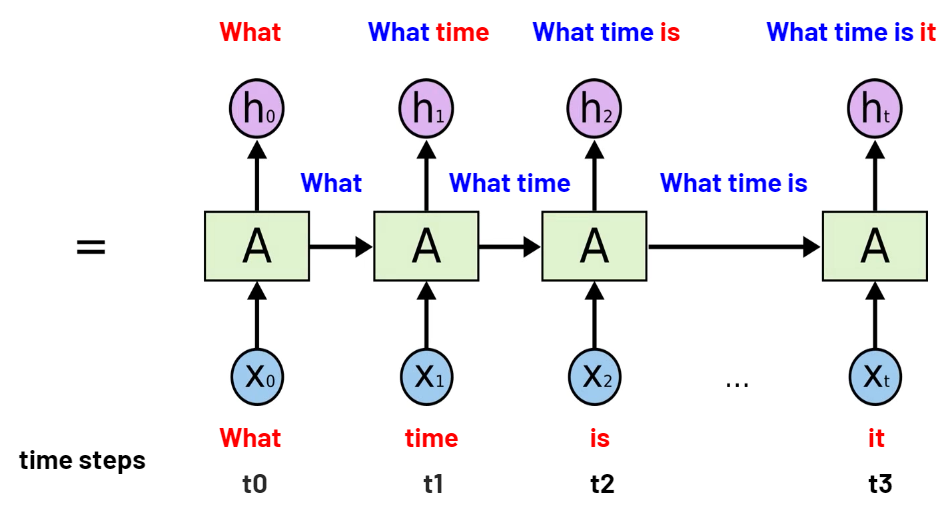

In [82]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

# Embedding layer NLP modellerinde kullanılan bir layer olup 3 boyutlu bir tensörden oluşur.
# 1'inci boyutu train setindeki toplam yorum sayısı.
# 2'inci boyutu her bir yorumun kaç tokenden oluştuğu (max_tokens).
# 3'üncü boyutu her bir tokene ait word embeddingin kaç elemanlı bir vektörden oluştuğu (embedding_size).
# Tokenler numeric versiona dönüştürülürken train corpusunda en sık kullanılan ilk 15000 token kullanıldığından, hem train hem de predicit aşamasında
# sadece train corpusunda en sık geçen ilk 15000 tokenin kullanılıp kullanılmadığını model kontrol edebilsin diye Embedding layera imput_dim = num_words
# düzenlemesini yapıyoruz.
# Eğer imput_dim'i 15.000'den daha küçük bir sayı yaparsanız (10000 gibi) o zaman model corpusta en sık kullanılan ilk 10000 token ile eğitim ve
# prediction yapar.

model.add(Dropout(0.2))

model.add(GRU(units=300, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=150, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))

# return_sequences=False modelin sadece son zaman adımındaki (t_n) hidden_state'i bir sonraki layera aktarır. defaultu False'dur.
# return_sequences= True,  modelin tüm zaman adımlarındaki (t_0, t_1, t_2 .....t_n gibi) hidden_state'leri bir sonraki LSTM, GRU layerlarına aktarır.
# Bu sayede  model tüm cümleyi aklında tutmaya çalışır. Bir LSTM/GRU layerından sonra yine bir LSTM/GRU layerı geliyorsa return_sequences=True olarak
# ayarlanmalıdır yoksa model hata döndürür. Ancak, sonraki layer dense layer ise return_sequences=False düzenlenmelidir aksi durumda model yine hata
# döndürür. Çünkü Dense layerlar sadece tek bir hidden_state ile çalışır.
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))
# sonraki layer GRU layer olduğundan return_sequences=True olarak düzenledik.

model.add(GRU(units=12, return_sequences=False))
# sonraki layer dense layer olduğundan return_sequences=False olarak düzenledik.


model.add(Dense(1, activation='sigmoid'))

In [50]:
# Dropout işlemi sırasında belirlenen oran, ortalama olarak kaç nöronun kapatılacağını ifade eder. Örneğin dropout(0.5) işlemi sırasında, her iterasyonda
# nöronların %50'si rastgele olarak kapatılır.Ancak bu oran her iterasyonda tam olarak aynı olmayabilir. Örneğin bir iterasyonda 0.3 , diğer iterasyonda 0.7
# olabilir ama ortalaması her zaman 0.5 olur.
# Bu nedenle oran her iterasyonda tahmin edebileceğiniz gibi değişebilir.

In [51]:
# Embedding layer is a layer used in NLP models and consists of a 3D tensor.
# 1st dimension is the total number of comments in the train set.
#2 how many tokens each comment consists of (max_tokens).
# The 3rd dimension is a vector of how many elements the word embedding of each token consists of (embedding_size).
# Since the first 15000 most frequent tokens in the train corpus are used when converting tokens to numeric version, both in train and predicit phase
# Embedding layera imput_dim = num_words so that the model can check if only the first 15000 most frequent tokens in the train corpus are used
# we make the edit.
# If you make imput_dim a number smaller than 15,000 (like 10000) then the model will train with the first 10000 tokens most frequently used in the corpus and
# makes prediction

# return_sequences=False transfers only the hidden_state from the last time step (t_n) of the model to the next layer. default is False.
# return_sequences= True transfers hidden_states from all time steps of the model (such as t_0, t_1, t_2 .....t_n) to the next LSTM, GRU layers.
# This way the model tries to remember the whole sentence. If an LSTM/GRU layer is followed by another LSTM/GRU layer, return_sequences=True
# must be set or the model will return an error. However, if the next layer is a dense layer, return_sequences=False must be set otherwise the model will return an error.
# returns. Because Dense layers work with only one hidden_state.


# The rate set during the dropout process refers to how many neurons will be turned off on average. For example, during dropout(0.5), at each iteration
# 50% of the neurons are randomly switched off, but this rate may not be exactly the same in each iteration. For example, it might be 0.3 in one iteration and 0.7 in another iteration
# but the average is always 0.5.
# So the ratio can change in each iteration, as you can imagine.




In [83]:
optimizer = Adam(learning_rate=0.001)

In [84]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

# compile (derleme) optimizasyon parametlerini düzenlediğimiz yerdir.
# compile parametreleri DL modelinin optimizosyon işlemlerinde kullanacağımız gradient descent algortimasının seçimi, loss functionın belirlenmesi
# ve optimizasyon işlemleri sırasında takip edilecek metricleri içerir. Detayları aşağıda olduğu gibidir.
# loss: Modelin optimize edilmesi için kullanılacak kayıp fonksiyonu. Örnek olarak, classification :binary_crossentropy veya categorical_crossentropy,
# regression:mse gibi.
# optimizer: Modelin ağırlıklarını optimize etmek için kullanılacak olan optimizasyon algoritması. Örnek olarak, SGD, Adam veya RMSprop gibi.
# metrics: Modelin performansını değerlendirmek için kullanılacak olan metrikler. Örnek olarak, accuracy, precision veya recall gibi.


# compile is where we edit the optimization parameters.
# compile parameters are the choice of the gradient descent algorithm that we will use in the optimization of the DL model, the loss function
# and includes metrics to be followed during optimization processes. The details are as follows.
# loss: The loss function to be used to optimize the model. For example, classification :binary_crossentropy or categorical_crossentropy,
# regression:mse
# optimizer The optimization algorithm that will be used to optimize the weights of the model. For example, SGD, Adam or RMSprop.
# metrics: The metrics that will be used to evaluate the performance of the model. For example, accuracy, precision or recall.

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [85]:
model.summary()
# embedding_size * num_words ==> 50 * 15001 ==> 750050

# 3 x (n2 + nm + 2n) m= input, n= output
# (50*50 + 50*50 + 2*50)*3 = 15.300 ==> m = 50, n = 50
# (25*25 + 50*25 + 2*25)*3 = 5775   ==> m = 50, n = 25
# (12*12 + 25*12 + 2*12)*3 = 1404   ==> m = 24, n = 12
# (12+1)*1 = 13 ==> (input+bias)*output

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 70, 300)           61569300  
                                                                 
 dropout_5 (Dropout)         (None, 70, 300)           0         
                                                                 
 gru_5 (GRU)                 (None, 70, 300)           541800    
                                                                 
 dropout_6 (Dropout)         (None, 70, 300)           0         
                                                                 
 gru_6 (GRU)                 (None, 70, 150)           203400    
                                                                 
 dropout_7 (Dropout)         (None, 70, 150)           0         
                                                                 
 gru_7 (GRU)                 (None, 70, 50)           

In [86]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           patience = 1,
                           restore_best_weights=True,
                           verbose=1)

In [56]:
#from sklearn.utils import class_weight
#classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
#pd.Series(classes_weights).unique()

In [87]:
weights = {0:0.05, 1:0.95}

https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss

In [88]:
model.fit(X_train_pad,
          y_train,
          epochs=10,
          batch_size=256,
          class_weight=weights,   #sample_weight= classes_weights
          validation_data=(X_test_pad, y_test),
          callbacks=[early_stop])

Epoch 1/10
857/857 [==============================] - 101s 109ms/step - loss: 0.0329 - recall: 0.8824 - val_loss: 0.1934 - val_recall: 0.8706
Epoch 2/10
857/857 [==============================] - 65s 76ms/step - loss: 0.0156 - recall: 0.9502 - val_loss: 0.1388 - val_recall: 0.7778
Epoch 2: early stopping


## Model evaluation

In [89]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.032853,0.882434,0.193414,0.870614
1,0.015568,0.950195,0.138832,0.777778


<Axes: >

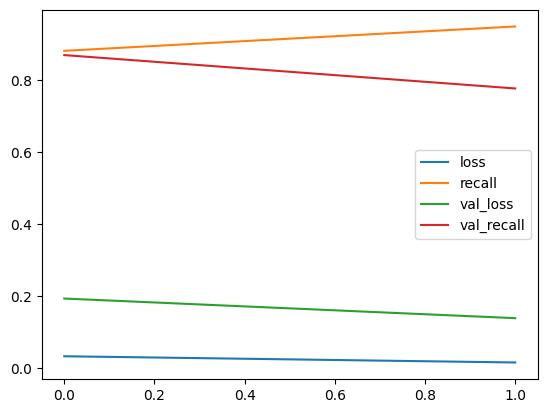

In [90]:
model_loss.plot()

In [91]:
model.evaluate(X_test_pad, y_test)

761/761 [==============================] - 7s 9ms/step - loss: 0.1934 - recall: 0.8706


[0.19341397285461426, 0.8706140518188477]

In [92]:
model.evaluate(X_train_pad, y_train)

6849/6849 [==============================] - 58s 8ms/step - loss: 0.1648 - recall: 0.9540


[0.1647876799106598, 0.9540136456489563]

In [93]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_pad) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

761/761 [==============================] - 7s 8ms/step
[[21514  1468]
 [  177  1191]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     22982
           1       0.45      0.87      0.59      1368

    accuracy                           0.93     24350
   macro avg       0.72      0.90      0.78     24350
weighted avg       0.96      0.93      0.94     24350



In [94]:
y_train_pred = model.predict(X_train_pad) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

6849/6849 [==============================] - 50s 7ms/step
[[195865  10974]
 [   566  11742]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    206839
           1       0.52      0.95      0.67     12308

    accuracy                           0.95    219147
   macro avg       0.76      0.95      0.82    219147
weighted avg       0.97      0.95      0.95    219147



761/761 [==============================] - 5s 7ms/step


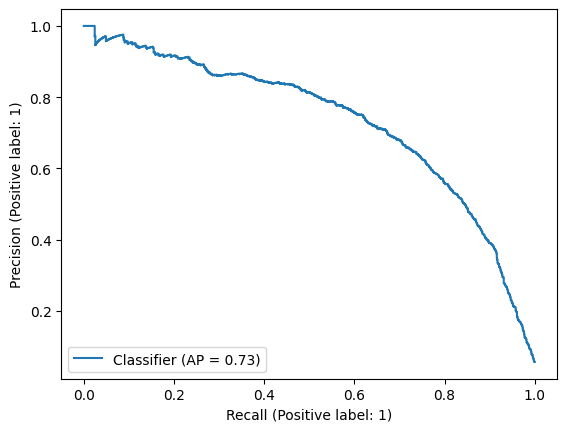

In [95]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test_pad)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [96]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7326493078879158

## Scores without sample_weight

Test set

                precision    recall  f1-score   support

           0       0.98      0.99      0.98     45965
           1       0.72      0.63      0.67      2735

    accuracy                           0.97     48700
   



 Train set

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    183856
           1       0.87      0.80      0.84     10941

    accuracy                           0.98    194797
   

## Model Saving

In [67]:
#model.save('/content/drive/MyDrive/review_hepsiburada.h5')

##Loading Model

In [68]:
#from tensorflow.keras.models import load_model
#model_review = load_model('/content/drive/MyDrive/review_hepsiburada.h5')

## Tokenizer Saving

In [69]:
#import joblib

# Tokenizer'ı kaydet
#joblib.dump(tokenizer, '/content/drive/MyDrive/tokenizer.joblib')

#pickle veya joblib kütüphanelerini kullanarak tokenizar algirtimamızı drive kaydedebiliriz.

## Loading Tokenizer

In [70]:
#import joblib

# Tokenizer'ı yükle
#loaded_tokenizer = joblib.load('/content/drive/MyDrive/tokenizer.joblib')

#pickle veya joblib kütüphanelerini kullanarak tokenizar algirtimamızı drive'dan çağırabiliriz.

## Predicton

In [97]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım."
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "üründe sıkıntı var"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik."
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün.Teşekkürler '
review15 = 'telefon kesinlikle bu parayı hak etmiyor. yeni hiç bir özelliği yok. ancak küçük ekran sevenler için iyi bir telefon'
review16 = 'müthiş bir telefon ama bu parayı hak etmiyor'
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14, review15, review16]

# 16 tane yorum için prediction alacağız.

# We'll take prediction for 16 comments.

In [98]:
tokens = tokenizer.texts_to_sequences(reviews)

# Öncelikle predict edeceğimiz textleri train datasında olduğu gibi datamızda en fazla kullanılan 15000 tokene göre  numeric versiona dönüştürüyoruz.
# train datasında en sık kullanılan ilk 15000 tokene göre dönüşümler yapıldığından ilk 15000 token dışında kalan tokenler predict aşamasında ignore edilir.

# First of all, we convert the texts that we will predict into numeric version according to the most used 15000 tokens in our data as in train data.
# Since the conversions are made according to the first 15000 most frequently used tokens in train data, tokens other than the first 15000 tokens are ignored in the predict phase.

In [99]:
np.array(tokens, dtype="object")

array([list([1, 146, 70, 9, 10]), list([73, 4]),
       list([103, 2, 1031, 2290, 1459, 5, 19, 5, 1784, 11674]),
       list([25461, 4235, 11684]),
       list([556, 61, 82, 26, 1, 445, 33, 3, 4, 32379, 1031, 2290, 37]),
       list([48, 1103, 6142, 20, 49]),
       list([177, 746, 7522, 20550, 82, 261, 105, 326]),
       list([48, 5, 30, 177, 2, 1742, 1235, 130109, 4, 1755, 4934, 84]),
       list([74, 2, 28, 111, 19]), list([636, 20, 859]),
       list([392, 178, 1007, 513]), list([453, 147, 35]),
       list([6953, 317, 62, 1, 177, 376, 475, 286, 6350, 102232, 22028, 46197, 22058, 1380, 41, 9533, 771, 19143, 149047, 82855]),
       list([38, 40, 20, 108, 2, 161, 29, 149, 3, 5, 2891, 73, 2, 4, 9, 10, 1191, 2394, 103, 113, 2024, 11, 103, 1155, 176, 12442, 63536, 4, 16]),
       list([44, 43, 5, 1242, 490, 733, 136, 48, 2, 239, 21, 82, 116, 166, 1620, 8, 6, 2, 44]),
       list([585, 2, 44, 12, 5, 1242, 490, 733])], dtype=object)

In [100]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens, padding="pre")
tokens_pad.shape

# tüm yorumları train datasında olduğu 70 tokene sabitliyoruz.

# we pin all comments to 70 tokens as in train data.

(16, 70)

In [101]:
prob = model.predict(tokens_pad)
prob

1/1 [==============================] - 0s 32ms/step


array([[0.01891291],
       [0.03461273],
       [0.9874658 ],
       [0.65618145],
       [0.8994553 ],
       [0.9783497 ],
       [0.9396116 ],
       [0.94062513],
       [0.13663848],
       [0.9005511 ],
       [0.02908143],
       [0.89172846],
       [0.9810846 ],
       [0.05411005],
       [0.9155872 ],
       [0.59713477]], dtype=float32)

In [102]:
[i[0] for i in prob]

[0.018912908,
 0.034612726,
 0.9874658,
 0.65618145,
 0.8994553,
 0.9783497,
 0.9396116,
 0.94062513,
 0.13663848,
 0.9005511,
 0.02908143,
 0.89172846,
 0.9810846,
 0.054110054,
 0.9155872,
 0.59713477]

In [103]:
pred = (model.predict(tokens_pad) >0.5).astype("int")
pred

1/1 [==============================] - 0s 21ms/step


array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [104]:
[i[0] for i in pred]

[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]

In [105]:
pd.set_option('display.max_colwidth', None) # None/-1 ile hücre genişliğini en uzun yoruma/satıra göre ayarlıyor.
my_dict = {"Review":reviews, "prob":[i[0] for i in prob], "classes":[i[0] for i in pred]}
pd.DataFrame(my_dict)

# DataFrame tüm featurların aynı boyutta olmasını istediğinden prob ve classes featurlarını 2 boyuttan tek boyuta düşürüyoruz.
# Bu sayede tüm featuraler aynı boyutta olmuş oluyor.

# Since DataFrame wants all featurers to be the same size, we reduce the probe and classes featurers from 2 sizes to one size.
# This way all featurers have the same size.

,Review,prob,classes
0,çok beğendim herkese tavsiye ederim,0.018913,0
1,süper ürün,0.034613,0
2,büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım,0.987466,1
3,kelimelerle tarif edilemez,0.656181,1
4,tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten,0.899455,1
5,hiç resimde gösterildiği gibi değil,0.978350,1
6,kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım.,0.939612,1
7,hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum,0.940625,1
8,tam bir fiyat performans ürünü,0.136638,0
9,beklediğim gibi çıkmadı,0.900551,1
